# ***IMPORTING LIBRARIES***

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
from sklearn.model_selection import train_test_split
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ***IMPORTING DATASET***

In [ ]:
df=pd.read_csv('Fraud (1).csv')

In [ ]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
  df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
zero_amount = df[df['amount'] == 0]
zero_amount.shape[0]

16

In [ ]:
zero_oldbalanceOrg = df[df['oldbalanceOrg'] == 0]
zero_oldbalanceOrg.shape[0]

2102449

In [ ]:
zero_newbalanceDest = df[df['newbalanceDest'] == 0]
zero_newbalanceDest.shape[0]

2439433

In [ ]:
df.loc[df['amount'] > 200000, 'isFlaggedFraud'] = 1

In [ ]:
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


# ***EXPLORATORY DATA ANALYSIS***

# ***`One Hot Ecoding`***

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
# Fit and transform the 'type' column
encoded_array = encoder.fit_transform(df[['type']])
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(['type']))

# Concatenate the original DataFrame with the encoded DataFrame
df = pd.concat([df.drop('type', axis=1), encoded_df], axis=1)

In [ ]:
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,0.0,0.0,0.0,0.0,1.0
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,0.0,1.0,0.0,0.0,0.0
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,1,0.0,1.0,0.0,0.0,0.0
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,1,0.0,0.0,0.0,0.0,1.0
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,1,0.0,1.0,0.0,0.0,0.0
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,1,0.0,0.0,0.0,0.0,1.0


# ***`Checking Balanced or Inbalanced Data`***

<ipython-input-23-0c9db97a4036>:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['isFraud'], sort = True)


Text(0, 0.5, 'Frequency')

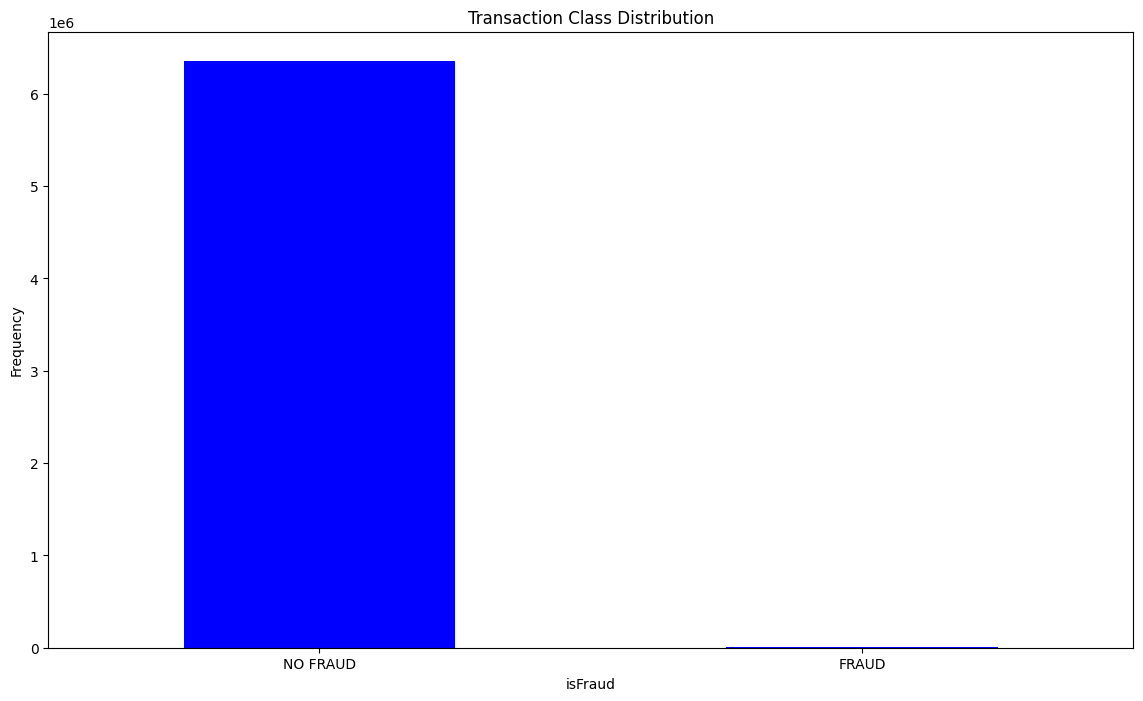

In [ ]:
LABELS = ["NO FRAUD", "FRAUD"]
count_classes = pd.value_counts(df['isFraud'], sort = True)
count_classes.plot(kind = 'bar', rot=0,color='blue')
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("isFraud")
plt.ylabel("Frequency")

In [ ]:
fraud = df[df['isFraud']==1]
nofraud = df[df['isFraud']==0]

In [ ]:
print(fraud.shape,nofraud.shape)

(8213, 15) (6354407, 15)


In [ ]:
max_fraud=fraud.amount.max()
max_fraud

10000000.0

In [ ]:
max_no_fraud=nofraud.amount.max()
max_no_fraud

92445516.64

# ***`Plotting`***

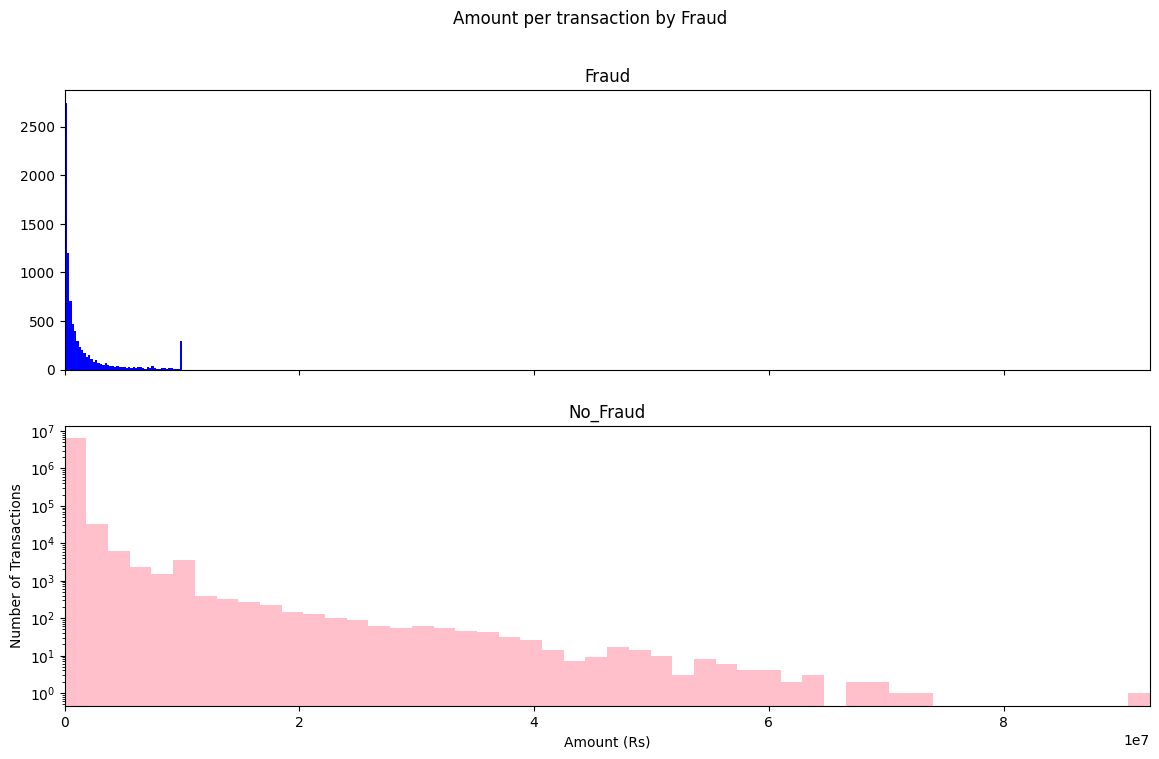

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Fraud')
bins = 50
ax1.hist(fraud.amount, bins = bins,color='blue')
ax1.set_title('Fraud')
ax2.hist(nofraud.amount, bins = bins,color='pink')
ax2.set_title('No_Fraud')
plt.xlabel('Amount (Rs)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 92445516.64))
plt.yscale('log')
plt.show()

# ***`Taking 10% of Sample Dataset`***

In [ ]:
#Taking only sample of data to reduce preprcessing time
sample_df= df.sample(frac = 0.1,random_state=1)
sample_df = sample_df.reset_index(drop=True)
sample_df.shape

(636262, 15)

In [ ]:
sample_df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,688,23557.12,C867750533,8059.00,31616.12,C1026934669,169508.66,145951.53,0,0,1.0,0.0,0.0,0.0,0.0
1,274,6236.13,C601099070,0.00,0.00,M701283411,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
2,133,33981.87,C279540931,18745.72,0.00,M577905776,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
3,225,263006.42,C11675531,20072.00,0.00,C529577791,390253.56,653259.98,0,1,0.0,1.0,0.0,0.0,0.0
4,249,152013.74,C530649214,20765.00,0.00,C1304175579,252719.19,404732.93,0,0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636257,179,39609.23,C869344066,244835.00,205225.77,C1453912740,0.00,253642.21,0,0,0.0,1.0,0.0,0.0,0.0
636258,255,437138.07,C1564159027,356001.00,0.00,C1120873445,358546.37,795684.44,0,1,0.0,1.0,0.0,0.0,0.0
636259,637,2344.98,C572462236,80827.00,78482.02,M1274006306,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0
636260,305,10152.33,C582338154,0.00,0.00,M1461849899,0.00,0.00,0,0,0.0,0.0,0.0,1.0,0.0


In [ ]:
Fraud = sample_df[sample_df['isFraud']==1]
No_Fraud = sample_df[sample_df['isFraud']==0]
outlier_fraction = len(Fraud)/float(len(No_Fraud))

In [ ]:
print(outlier_fraction)
print("Fraud Cases : {}".format(len(Fraud)))
print("No_Fraud Cases : {}".format(len(No_Fraud)))

0.0012888646188564514
Fraud Cases : 819
No_Fraud Cases : 635443


# ***CORRELATION MATRIX***

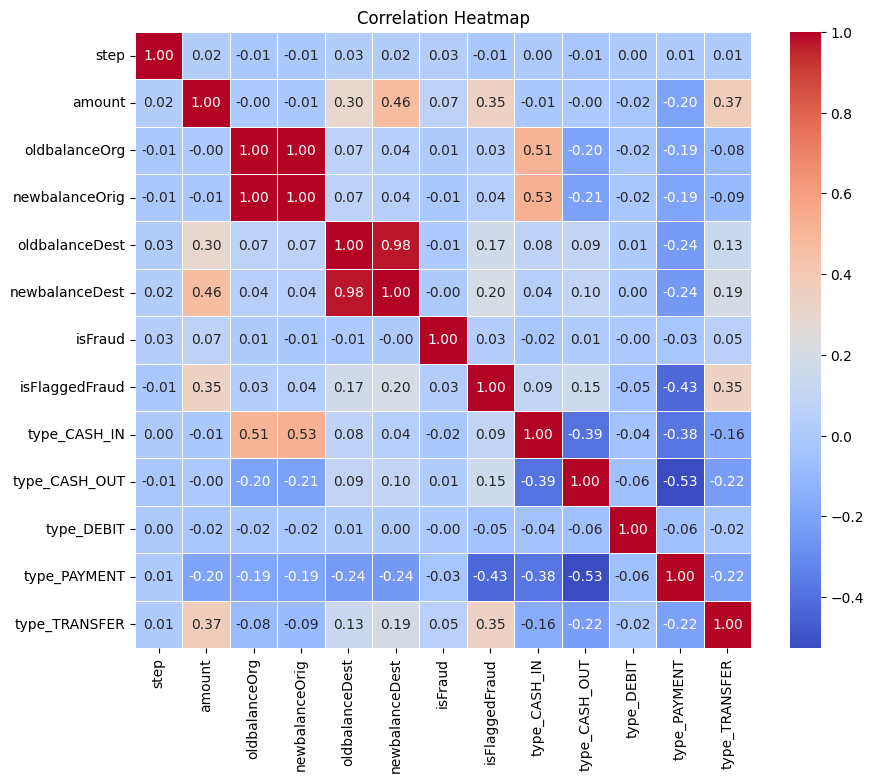

In [ ]:
numerical_cols = sample_df.select_dtypes(include=['float64', 'int64']).columns
corrmat = sample_df[numerical_cols].corr()  # Use only numerical columns
top_corr_features = corrmat.index
plt.figure(figsize=(10, 8))
# Plot heatmap
sns.heatmap(corrmat, annot=True, cmap='coolwarm', square=True, cbar=True, fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

# ***`FEATURE SELECTION`***

In [ ]:
feature_reduced_df=sample_df.drop(['step','type_DEBIT','type_PAYMENT','nameDest','nameOrig'],axis=1)
feature_reduced_df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_TRANSFER
0,23557.12,8059.00,31616.12,169508.66,145951.53,0,0,1.0,0.0,0.0
1,6236.13,0.00,0.00,0.00,0.00,0,0,0.0,0.0,0.0
2,33981.87,18745.72,0.00,0.00,0.00,0,0,0.0,0.0,0.0
3,263006.42,20072.00,0.00,390253.56,653259.98,0,1,0.0,1.0,0.0
4,152013.74,20765.00,0.00,252719.19,404732.93,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
636257,39609.23,244835.00,205225.77,0.00,253642.21,0,0,0.0,1.0,0.0
636258,437138.07,356001.00,0.00,358546.37,795684.44,0,1,0.0,1.0,0.0
636259,2344.98,80827.00,78482.02,0.00,0.00,0,0,0.0,0.0,0.0
636260,10152.33,0.00,0.00,0.00,0.00,0,0,0.0,0.0,0.0


# ***`Splitting the data`***

In [ ]:
target = "isFraud"
# Define a random state
state = np.random.RandomState(42)
X = feature_reduced_df.drop('isFraud', errors='ignore')
Y = feature_reduced_df[target]
X_outliers = state.uniform(low=0, high=1, size=(X.shape[0], X.shape[1]))
# Print the shapes of X & Y
print(X.shape)
print(Y.shape)

(636262, 10)
(636262,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(509009, 10)

# ***`Standardization`***

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [ ]:
X_scaled.shape

(509009, 10)

In [ ]:
X_test_scaled = scaler.transform(X_test)

# ***`PCA`***

In [60]:
pca = PCA()
pca.fit(X)

PCA()

In [61]:
k = 0
total = 0
while total <.99:
    total = total + pca.explained_variance_ratio_[k]  #adding variance ratio
    k = k + 1
k

3

In [63]:
pca = PCA(n_components=k)
#pca.fit(class1)

pca_trans = pca.fit_transform(X)
print(pca.components_)
print(pca.explained_variance_ratio_) #explained variance ratios wrt each component
print(pca_trans.shape)

[[ 4.70702232e-02  1.13419964e-01  1.15181667e-01  6.68876657e-01
   7.24056287e-01 -2.04286823e-11  1.71215212e-08  1.07136784e-08
   6.20673774e-09  8.74421933e-09]
 [-1.19861123e-02  6.93435477e-01  7.01959558e-01 -9.76113663e-02
  -1.29338211e-01  9.69984566e-12 -4.91445909e-10  5.09317700e-08
  -2.59876165e-08 -7.90091065e-09]
 [ 7.14583067e-01  2.47873396e-02 -4.67505759e-03 -5.37536537e-01
   4.46977901e-01  2.95538585e-09  1.44317399e-07 -4.47222090e-08
  -1.48759613e-08  1.20301132e-07]]
[0.57707382 0.40855726 0.01285477]
(636262, 3)


In [65]:
x_approx = pca.inverse_transform(pca_trans)
x_approx.shape

(636262, 10)

# ***MODEL PREDICTION***

In [ ]:
classifiers = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(X_train),
                                         contamination=outlier_fraction, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, contamination=outlier_fraction),
}

In [ ]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the model on training data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred_train = clf.fit_predict(X_train)
        y_pred_test = clf.fit_predict(X_test)  # Predict on test data
        scores_prediction_train = clf.negative_outlier_factor_
    else:
        clf.fit(X_train, y_train)  # Fit on training data
        scores_prediction_train = clf.decision_function(X_train)
        y_pred_train = clf.predict(X_train)
        scores_prediction_test = clf.decision_function(X_test)  # Decision function for test
        y_pred_test = clf.predict(X_test)  # Predict on test data

    # Reshape the prediction values to 0 for valid transactions and 1 for fraud transactions
    y_pred_train[y_pred_train == 1] = 0
    y_pred_train[y_pred_train == -1] = 1

    y_pred_test[y_pred_test == 1] = 0
    y_pred_test[y_pred_test == -1] = 1

    # Calculate errors for both training and testing sets
    n_errors_train = (y_pred_train != y_train).sum()
    n_errors_test = (y_pred_test != y_test).sum()

    # Print the classifier name and number of errors
    print(f"{clf_name} - Training Errors: {n_errors_train}, Testing Errors: {n_errors_test}")

    # Run classification metrics for the test set
    print(f"Accuracy Score on Test Set: {accuracy_score(y_test, y_pred_test)}")
    print(f"Classification Report on Test Set for {clf_name}:")
    print(classification_report(y_test, y_pred_test))

Isolation Forest - Training Errors: 886, Testing Errors: 216
Accuracy Score on Test Set: 0.9983025940449342
Classification Report on Test Set for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127095
           1       0.34      0.39      0.36       158

    accuracy                           1.00    127253
   macro avg       0.67      0.69      0.68    127253
weighted avg       1.00      1.00      1.00    127253

Local Outlier Factor - Training Errors: 1306, Testing Errors: 321
Accuracy Score on Test Set: 0.9974774661501105
Classification Report on Test Set for Local Outlier Factor:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127095
           1       0.01      0.01      0.01       158

    accuracy                           1.00    127253
   macro avg       0.50      0.50      0.50    127253
weighted avg       1.00      1.00      1.00    127253



# ***USING X_SCALED***

In [ ]:
for i, (clf_name, clf) in enumerate(classifiers.items()):
    # Fit the model on training data and tag outliers
    if clf_name == "Local Outlier Factor":
        y_pred_train = clf.fit_predict(X_scaled)
        y_pred_test = clf.fit_predict(X_test_scaled)  # Predict on test data
        scores_prediction_train = clf.negative_outlier_factor_
    else:
        clf.fit(X_scaled, y_train)  # Fit on training data
        scores_prediction_train = clf.decision_function(X_scaled)
        y_pred_train = clf.predict(X_scaled)
        scores_prediction_test = clf.decision_function(X_test_scaled)  # Decision function for test
        y_pred_test = clf.predict(X_test_scaled)  # Predict on test data

    # Reshape the prediction values to 0 for valid transactions and 1 for fraud transactions
    y_pred_train[y_pred_train == 1] = 0
    y_pred_train[y_pred_train == -1] = 1

    y_pred_test[y_pred_test == 1] = 0
    y_pred_test[y_pred_test == -1] = 1

    # Calculate errors for both training and testing sets
    n_errors_train = (y_pred_train != y_train).sum()
    n_errors_test = (y_pred_test != y_test).sum()

    # Print the classifier name and number of errors
    print(f"{clf_name} - Training Errors: {n_errors_train}, Testing Errors: {n_errors_test}")

    # Run classification metrics for the test set
    print(f"Accuracy Score on Test Set: {accuracy_score(y_test, y_pred_test)}")
    print(f"Classification Report on Test Set for {clf_name}:")
    print(classification_report(y_test, y_pred_test))

Isolation Forest - Training Errors: 902, Testing Errors: 217
Accuracy Score on Test Set: 0.998294735684031
Classification Report on Test Set for Isolation Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127095
           1       0.33      0.35      0.34       158

    accuracy                           1.00    127253
   macro avg       0.66      0.68      0.67    127253
weighted avg       1.00      1.00      1.00    127253

Local Outlier Factor - Training Errors: 1318, Testing Errors: 319
Accuracy Score on Test Set: 0.9974931828719166
Classification Report on Test Set for Local Outlier Factor:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127095
           1       0.01      0.01      0.01       158

    accuracy                           1.00    127253
   macro avg       0.51      0.51      0.51    127253
weighted avg       1.00      1.00      1.00    127253



# ***`Key Factors that Predict Fraudulent Customers`***

### **1. Transaction Amount:**
 Insight: Higher transaction amounts correlate TRANSFER types. Fraudulent transactions often involve significant sums to quickly deplete accounts.

### **2. Type of Transaction:**
Insight: Certain transaction types, like CASH_OUT and TRANSFER, are typically more associated with fraud compared to PAYMENT or CASH-IN, as they indicate an outflow of funds.

### **3. Changes in Balances:**
Insight: A large difference between oldbalanceOrg and newbalanceOrig may suggest that a customer is attempting to withdraw or transfer funds rapidly, indicating potential fraudulent activity.

### **4. Recipient's Balance and Type:**
Insight: If a recipient's balance is low before receiving a large transfer (and particularly if they are classified as a merchant), it may indicate unusual activity.

### **5. Frequency of Transactions:**
Insight: A high frequency of transactions within a short time frame can raise red flags, suggesting an account may be compromised.

### **6. Customer History:**
Insight: New customers or those with little transaction history may present higher risks compared to established customers with predictable patterns.

# ***`Yes, they make sense because:`***

### **1. Behavioral Analysis: **
The factors identified align with behavioral patterns often observed in fraudulent activity. Fraudsters typically exploit systems by making large withdrawals quickly, using different transaction types to confuse detection systems, or attempting multiple transactions to evade detection.
### **2. Risk Assessment: **
Financial institutions rely on similar factors in risk assessment models. Identifying abnormal patterns helps in quickly spotting potential fraud.
### **3.Data-Driven Approach:**
These factors are not arbitrary; they are derived from empirical data analysis and prior case studies in fraud detection.

# ***`Prevention Strategies for Infrastructure Updates`***

When updating its infrastructure, a company should consider the following prevention strategies:

### **1. Enhanced Monitoring Systems:**
Implement real-time transaction monitoring to detect unusual patterns based on the identified key factors.

### **2. Machine Learning Models:**
Develop predictive models that continuously learn from transaction data to identify and flag potentially fraudulent activities.

### **3. Multi-Factor Authentication (MFA):**
Enforce MFA for high-risk transactions to prevent unauthorized access.

### **4. Customer Education:**
Educate customers about potential scams and safe practices to minimize risks from social engineering.

### *5. Data Encryption:*
Ensure that sensitive customer data is encrypted to protect against breaches.

### **6.Regular Audits and Updates:**
Perform regular audits of transaction processes and security systems to identify vulnerabilities.

# ***`Determining Effectiveness of Implemented Actions`***

To assess whether the implemented actions are effective, consider the following approaches:

### **1. Reduction in Fraud Incidents:**
Analyze historical data to compare the rate of fraudulent transactions before and after implementation. A significant decrease would indicate effectiveness.

### **2. Model Performance Metrics:**
Evaluate the performance of machine learning models using metrics such as precision, recall, F1 score, and AUC-ROC to assess their ability to correctly identify fraud.

### **3. Customer Feedback:**
Collect feedback from customers regarding their experiences and perceptions of security. Increased confidence in the system could be an indicator of success.

### **4. Monitoring False Positives:**
Track the rate of false positives (legitimate transactions flagged as fraud) and aim to minimize them, ensuring that legitimate customer transactions are not unduly affected.

### **5. Continuous Improvement:**
Establish a feedback loop where the system is continually updated based on new data and insights, allowing for ongoing refinement of fraud detection strategies.